In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../1_dock')
sys.path.append('../ifp')
sys.path.append('../mcss')
sys.path.append('../3_analyze')
from shared_paths import shared_paths
from containers import Protein
%matplotlib inline

In [2]:
datasets = [d for d in sorted(os.listdir(shared_paths['data']))
            if d[0] != '.' and d[-3:] != 'old' and d[0] in ['P', 'Q', 'O']]

In [3]:
data = {}
for i, d in enumerate(datasets):
    print(i, d)
    protein = Protein(d)
    lm = protein.lm

    ligands = lm.docked(lm.pdb)[:20]
    protein.load_docking(ligands, False, False, False)
    lm.mcss.load_mcss()
    for ligand in ligands:
        crystal_lig = "{}_lig".format(lm.st)
        if ligand == crystal_lig:
            size = 1
        else:
            size = lm.mcss.get_mcss_size(ligand, crystal_lig)
        rmsds = [pose.rmsd for pose in protein.docking[lm.st].ligands[ligand].poses]
        if d not in data: data[d] = {}
        data[d][ligand] = (size, rmsds)

(0, 'O60885')
(1, 'P00489')
(2, 'P00734')
(3, 'P00742')
(4, 'P00749')
(5, 'P00760')
(6, 'P03951')
(7, 'P07900')
(8, 'P18031')
(9, 'P24941')
(10, 'P56817')
(11, 'PLK1')
(12, 'Q16539')
(13, 'Q9Y233')


In [4]:
print len(data)
print sum([len(v) for k, v in data.items()])
print
for count, key in sorted([(len(v), k) for k, v in data.items()]):
    print '{}\t{}'.format(key, count)

14
256

PLK1	12
P24941	13
P03951	14
O60885	17
P00489	20
P00734	20
P00742	20
P00749	20
P00760	20
P07900	20
P18031	20
P56817	20
Q16539	20
Q9Y233	20


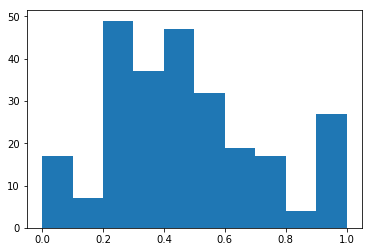

In [5]:
plt.hist([size for protein, ligands in data.items() for (size, rmsds) in ligands.values()])
plt.show()

# Fraction top pose correct

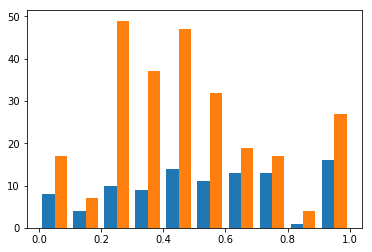

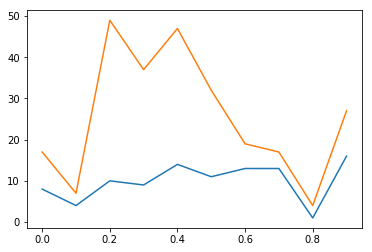

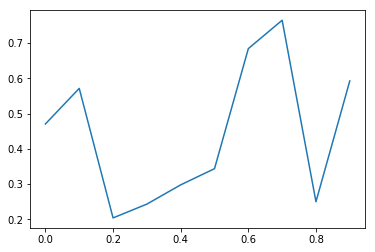

In [6]:
correct   = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values() if rmsds[0] <= 2.0]
total = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()]

a = plt.hist([correct, total])
plt.show()
correct, total = a[0]
x = a[1][:-1]

plt.plot(x, correct)
plt.plot(x, total)
plt.show()

plt.plot(x, np.array(correct) / np.array(total))
plt.show()

# Correct pose in top 100

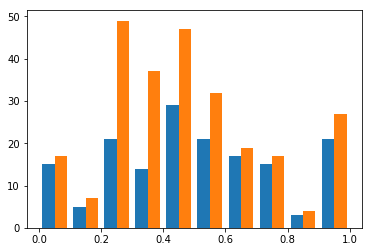

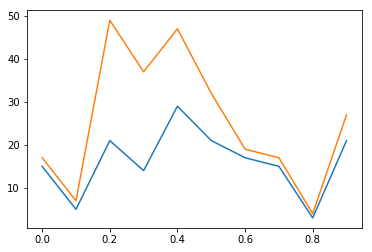

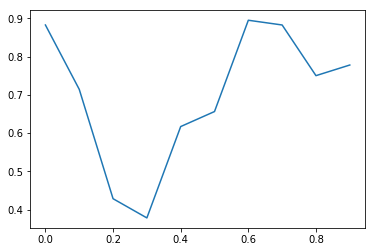

In [7]:
correct   = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values() if min(rmsds[:100]) <= 2.0]
total = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values()]

a = plt.hist([correct, total])
plt.show()
correct, total = a[0]
x = a[1][:-1]

plt.plot(x, correct)
plt.plot(x, total)
plt.show()

plt.plot(x, np.array(correct) / np.array(total))
plt.show()

# Top pose correct given that one exists in top 100

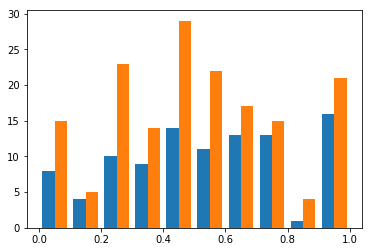

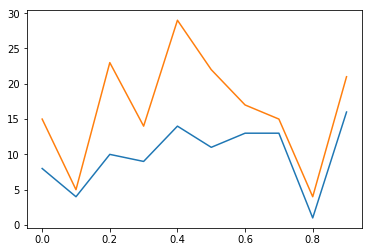

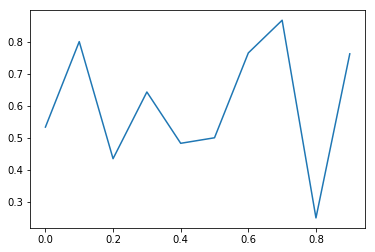

In [8]:
correct = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values() if rmsds[0] <= 2.0]
total   = [size for protein, ligands in data.items() for (size, rmsds) in ligands.values() if min(rmsds) <= 2.0]

a = plt.hist([correct, total])
plt.show()
correct, total = a[0]
x = a[1][:-1]

plt.plot(x, correct)
plt.plot(x, total)
plt.show()

plt.plot(x, np.array(correct) / np.array(total))
plt.show()

# What does MCSS size zero look like? 

In [9]:
c = 0
for protein, ligands in data.items():
    for ligand, (size, rmsds) in ligands.items():
        if size == 0:
            c += 1
c

17